**MLP классификатор (PyTorch)** 

Евгений Борисов  <esborisov@sevsu.ru>

О методах обучения многослойных нейронных сетей прямого распространения.    
http://mechanoid.su/neural-net-backprop.html  
http://mechanoid.su/neural-net-backprop2.html

In [1]:
import numpy as np
from numpy import random as rng
import matplotlib.pyplot as plt

In [2]:
np.set_printoptions(precision=2)

## генерируем данные

In [3]:
n_samples = 1500

# from sklearn.datasets import make_blobs
# X,target = make_blobs( n_samples=n_samples, centers=2,  cluster_std=[1.5, 1.8,] )

# from sklearn.datasets import make_moons
# X,target = make_moons(n_samples=n_samples, noise=.09)

from sklearn.datasets import make_circles
X,target = make_circles(n_samples=n_samples, shuffle=True, noise=.09, factor=.3)
# X = X+(np.random.rand(X.shape[0],X.shape[1])*0.6)


y = np.eye(len(target),2)[target] # [:,np.newaxis]

X.shape, y.shape

((1500, 2), (1500, 2))

In [4]:
# нормируем данные
# from sklearn.preprocessing import MinMaxScaler
# X = MinMaxScaler([-1.0,1.0]).fit_transform(X)

# from sklearn.preprocessing   import StandardScaler
# X = StandardScaler().fit(X).transform(X)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((750, 2), (750, 2), (750, 2), (750, 2))

In [6]:
del X
del y
del target

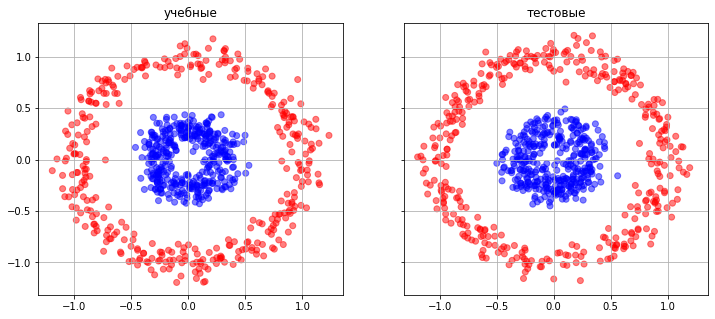

In [7]:
def plot_data(ax,X,y,t):
    c = [ ['b','r','g','y'][j] for j in y.astype(int).flatten()  ]
    ax.set_title(t)
    ax.scatter( x=X[:,0], y=X[:,1], c=c,  alpha=0.5 )
    ax.grid()

fig, (ax0,ax1) = plt.subplots(1,2, sharey=True, sharex=True, figsize=(12,5),)
plot_data(ax0,X_train,y_train[:,0],'учебные')    
plot_data(ax1,X_test,y_test[:,0],'тестовые')    
plt.show()

## модель

схема нейрона

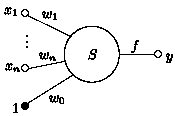

схема MPL 

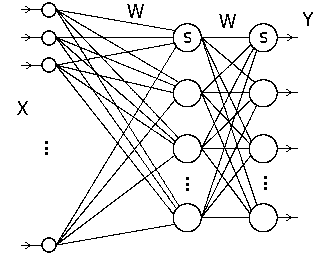

In [16]:
import torch
from torch import nn
from torch import optim
# from torch.optim import lr_scheduler
# from torch.nn import functional as F
from torch import sigmoid

In [18]:
class MLP(nn.Module): 
    
    def __init__(self,input_size,output_size):
        super().__init__()
        
        self.dense1 = nn.Linear(input_size,10) # первый - обрабатывающий  слой 
        self.dense2 = nn.Linear(10,5) # второй - обрабатывающий/скрытый слой
        self.dense3 = nn.Linear(5,output_size) # третий - обрабатывающий/выходной слой

    def forward(self,x):
        o = self.dense1(x)
        o = sigmoid(o)
        
        o = self.dense2(o)
        o = sigmoid(o)
        
        o = self.dense3(o)
        o = sigmoid(o)
        
        return o
    
    def predict(self, x):    
        return self.forward(x)
    

In [20]:
# model = MLP( input_size=X_train.shape[1], output_size=y_train.shape[1], )
# model.predict(torch.Tensor(X_train))

## обучаем модель

функция потери средняя квадратичная ошибка
$$L=MSQE(y,o)=\frac{1}{m}\sum\limits_{i=0}^m(o_i-y_i)^2$$

In [ ]:
# from tensorflow.keras.callbacks import Callback

# class AccuracyCallback(Callback): 
    
#     def on_epoch_end(self, epoch, logs={}): 
#         min_acc=.98
#         acc = logs.get('accuracy')
#         if acc is not None:
#             if(logs.get('accuracy') > min_acc):   
#                 print('\naccuracy threshold reached\n')
#                 self.model.stop_training = True
        

In [ ]:
# optimizer = tf.keras.optimizers.Adam(learning_rate=.1)
# loss = tf.keras.losses.MeanSquaredError()
# model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])

In [ ]:
# from tensorflow.python.client import device_lib

# devices = [ d.name for d in device_lib.list_local_devices() if d.device_type=='GPU' ]
# device = devices[0] if len(devices)>0 else 'cpu'
# device

In [ ]:
# # используем GPU если есть
# device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
# device

In [22]:
criterion = nn.MSELoss() # ф-ция потери
#optimizer = optim.SGD(model.parameters(), lr=3e-1, momentum=.3,weight_decay=.01) # метод оптимизации ф-ции потери
optimizer = optim.SGD(model.parameters(), lr=3e-1, momentum=.1,) # метод оптимизации ф-ции потери


In [23]:
# пакуем данные в формат Torch
X_train = torch.Tensor(X_train)
y_train = torch.Tensor(y_train)

# model = model.cpu()

# with torch.set_grad_enabled(False):
#     dataset['score']  = np.vstack([
#         model.predict( torch.Tensor(df.values.astype(np.float32)).to(device) ).cpu().numpy()
#         for df in tqdm( split( dataset[cols_data], chunksize=batch_size ) )
#     ])

In [ ]:
from tqdm import tqdm

In [ ]:
%%time

n_epoch = 50 # количество эпох обучения
batch_size = 250_000 # размер одного батча примеров
loss_history = [] # история изменения значений ф-ции потери
acc_history = [] # история изменения значений погрешности

for _ in tqdm(range(n_epoch)): 
    for x1,x2,target in get_batch(X,pair,batch_size): # получаем батч учебных примеров
        margin = model.forward(x1.to(device),x2.to(device)) # сравнение скора ранжируемых пар
        loss = criterion( margin, target.to(device) ) # вычисляем значение ф-ции потери
        loss_history.append(loss.item()) # дополняем историю изменения значений ф-ции потери
        optimizer.zero_grad() # очищаем предыдущее значение градиента
        loss.backward()  # вычисляем текущее значение градиента ф-ции потери
        optimizer.step() # корректируем параметры модели
    scheduler.step() # корректируем параметр скорости обучения

In [ ]:
# def fit_epoch(x,weight,y,lr): # шаг обучения модели
#     d_weight = gradient(x,weight,y) # градиент функции потери, изменение весов
#     return weight_adjust(weight,d_weight,lr) # корректируем параметры

In [ ]:
# %%time

# # метод градиентного спуска

# lr = 5e-2 # скорость обучени
# n_samples = len(y_train) # количество примеров
# n_epoch = 2000 # максимальное число циклов обучения
# acc_min = .98 # порог минимально допустимой погрешности модели
# n_param = X_train.shape[1] # размер вектора признаков

# # начальное значение ф-ции потери
# loss_history = [ loss(y_train,score(X_train,weight)) ]
# acc_history = [ accuracy_score( y_train[:,1].astype(int), (score(X_train,weight)[:,1]>.5).astype(int) ) ]

# for i in range(n_epoch): # цикл обучения
#     weight = fit_epoch(X_train,weight,y_train,lr) # корректируем веса модели
#     loss_history.append( loss(y_train,score(X_train,weight)) ) # считаем значение ф-ции потери
#     acc_history.append( accuracy_score( y_train[:,1].astype(int) , (score(X_train,weight)[:,1]>.5).astype(int) ) )
    
#     if acc_history[-1] > acc_min: # проверяем достижение минимального порога погрешности модели
#         print('step %i/%i: loss %.03f, acc threshold %.03f reached\n'%(i+1,n_epoch,loss_history[-1],acc_min))
#         break

----

In [ ]:
%%time

result = model.fit(
    X_train,
    y_train,
    batch_size=len(y_train)//3, 
    epochs=135,
    callbacks=[AccuracyCallback()],
)    

In [ ]:
# история изменения значений погрешности модели
plt.plot(result.history['accuracy'],label='max acc=%.3f'%(max(result.history['accuracy'])),c='r')
plt.grid()
plt.legend()

In [ ]:
# история изменения значений ф-ции потери
plt.plot(result.history['loss'],label='min loss=%.3f'%(min(result.history['loss'])))
plt.grid()
plt.legend()

## тестируем модель

In [ ]:
# пакуем данные в формат TF
X_test = tf.cast(X_test,tf.float32)

In [ ]:
s = model.predict(X_test)[:,1]

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

fpr, tpr, thresholds = roc_curve( y_test[:,1], s )
roc_auc = auc(fpr,tpr)

plt.figure(figsize=(7,7))
plt.grid(True)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC AUC %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# оптимальный порого скора 
#  максимальное количество True Positive при минимальном количестве False Positive
optimal_threshold = thresholds[ np.argmax( np.abs(tpr-fpr) )  ]
optimal_threshold

In [ ]:
p = (s>optimal_threshold).astype(int)
y = y_test[:,1].astype(int)

In [ ]:
fig, (ax0,ax1) = plt.subplots(1,2, sharey=True, sharex=True, figsize=(12,5),)
plot_data(ax0,X_test,y,'тестовые')    
plot_data(ax1,X_test,p,'результат')    
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y,p))

## карта скоров

In [ ]:
# строим сетку и определяем значения скора классификатора во всех узлах

n=500 # количество разбиений сетки

xx,yy = np.meshgrid(
    np.linspace( X_test[:,0].numpy().min()-.1, X_test[:,0].numpy().max()+.1, n), 
    np.linspace( X_test[:,1].numpy().min()-.1, X_test[:,1].numpy().max()+.1, n)
) # узлы сетки

xy = np.vstack([xx.flatten(),yy.flatten() ]).T # разворачиваем сетку 

# пакуем данные в формат TF
xy = tf.cast(xy,tf.float32)
s = model.predict(xy)[:,1]

plt.figure(figsize=(7,7))
plt.contourf(xx, yy, (1.-s).reshape(n,n), cmap=plt.cm.RdBu)
plt.scatter( x=X_test[:,0], y=X_test[:,1], c=y_test[:,1].astype(int), alpha=.5 )
plt.grid()